In [1]:
# Get parent directory and add to sys.path
import os; import sys
import numpy as np
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [ ]:
# MPC import
from LinearMPC_5_2_OffsetFree.MPCVelControl import MPCVelControl

from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 15
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])  # initial state
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

# Static mass change and zero fuel rate
rocket.mass = 2.0
rocket.fuel_rate = 0.1
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(mpc, sim_time, H, x0, x_target=x_target, method='nonlinear')


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 4 iterations:
  Dimension: 3
Maximum invariant set successfully computed after 4 iterations:
  Dimension: 3
_setup_controller for z_vel
Maximum invariant set successfully computed after 44 iterations:
  Dimension: 2
Simulating time 0.00: 

c:\Users\linhp\miniforge3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Fuel left: 1.00 kg, 
Simulating time 0.05: Fuel left: 1.00 kg, 
Simulating time 0.10: Fuel left: 0.99 kg, 
Simulating time 0.15: Fuel left: 0.99 kg, 
Simulating time 0.20: Fuel left: 0.99 kg, 
Simulating time 0.25: Fuel left: 0.99 kg, 
Simulating time 0.30: Fuel left: 0.99 kg, 
Simulating time 0.35: Fuel left: 0.98 kg, 
Simulating time 0.40: Fuel left: 0.98 kg, 
Simulating time 0.45: Fuel left: 0.98 kg, 
Simulating time 0.50: Fuel left: 0.98 kg, 
Simulating time 0.55: Fuel left: 0.98 kg, 
Simulating time 0.60: Fuel left: 0.97 kg, 
Simulating time 0.65: Fuel left: 0.97 kg, 
Simulating time 0.70: Fuel left: 0.97 kg, 
Simulating time 0.75: Fuel left: 0.97 kg, 
Simulating time 0.80: Fuel left: 0.97 kg, 
Simulating time 0.85: Fuel left: 0.96 kg, 
Simulating time 0.90: Fuel left: 0.96 kg, 
Simulating time 0.95: Fuel left: 0.96 kg, 
Simulating time 1.00: Fuel left: 0.96 kg, 
Simulating time 1.05: Fuel left: 0.96 kg, 
Simulating time 1.10: Fuel left: 0.95 kg, 
Simulating time 1.15: Fuel left: 

In [4]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, Ref=ref[:,:-1], T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol); 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

 JS Error => error: Uncaught SyntaxError: Unexpected token '&&'


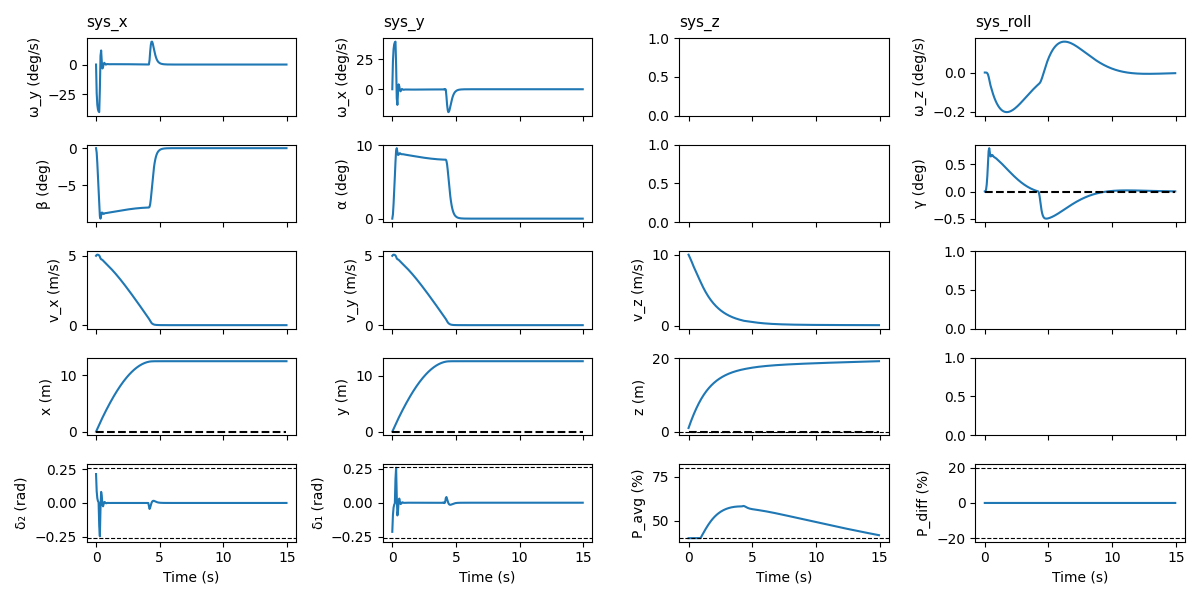

In [5]:
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, ref[:,:-1])

In [6]:
state_error = np.array(x_cl[:, -1]) - x_target
with np.printoptions(precision=6, suppress=True):
    print(f"the angle vel error {state_error[:3]}")
    print(f"the angle error {state_error[3:6]}")
    print(f"The Linear vel error {state_error[6:9]}")

the angle vel error [-0.        0.       -0.000054]
the angle error [ 0.       -0.        0.000042]
The Linear vel error [0.       0.       0.098104]
